In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-csv/matches - matches.csv


In [30]:
import numpy as np
import pandas as pd

In [31]:
data=pd.read_csv('/kaggle/input/ipl-csv/matches - matches.csv')
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [32]:
type(data)

pandas.core.frame.DataFrame

In [33]:
data.head()
#provides the preview of the dataset
#we can also give the number of lines of preview as data.head(4)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [34]:
data.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [35]:
data.shape
#its an attribute,not a function

(636, 18)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [37]:
data.describe()
#works only on numerical data

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [38]:
data['winner']

0              Sunrisers Hyderabad
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4      Royal Challengers Bangalore
                  ...             
631    Royal Challengers Bangalore
632    Royal Challengers Bangalore
633            Sunrisers Hyderabad
634            Sunrisers Hyderabad
635            Sunrisers Hyderabad
Name: winner, Length: 636, dtype: object

In [39]:
type(data['winner'])
#in case of fetching single column, its a series

pandas.core.series.Series

In [40]:
data[['team1','team2','winner']]

,team1,team2,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
...,...,...,...
631,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore
632,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore
633,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad
634,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad


In [41]:
type(data[['team1','team2','winner']])
#in case of multiple column fetching, its dataframe

pandas.core.frame.DataFrame

In [42]:
data[['team1','team2','winner']].shape

(636, 3)

In [43]:
data['winner'].shape

(636,)

In [44]:
data.iloc[0]
#fetches the 1st row data

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

In [45]:
type(data.iloc[0])

pandas.core.series.Series

In [46]:
data.iloc[3:7]
#fetches 3rd,4th,5th,6th row data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [47]:
type(data.iloc[3:7])

pandas.core.frame.DataFrame

In [48]:
data.iloc[:,[4,5,10]]

,team1,team2,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
...,...,...,...
631,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore
632,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore
633,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad
634,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad


In [49]:
data.iloc[63:67,[3,4,5,10]]

,date,team1,team2,winner
63,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Kolkata Knight Riders
64,2008-04-21,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals
65,2008-04-22,Deccan Chargers,Delhi Daredevils,Delhi Daredevils
66,2008-04-23,Chennai Super Kings,Mumbai Indians,Chennai Super Kings


In [50]:
data.iloc[63:67,3:11]

,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner
63,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders
64,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals
65,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils
66,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings


In [51]:
#matches played in Delhi
mask=data['city']=='Delhi'
data[mask]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
17,18,2017,Delhi,2017-04-17,Delhi Daredevils,Kolkata Knight Riders,Delhi Daredevils,bat,normal,0,Kolkata Knight Riders,0,4,NM Coulter-Nile,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
38,39,2017,Delhi,2017-05-02,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,6,Mohammed Shami,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
40,41,2017,Delhi,2017-05-04,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,7,RR Pant,Feroz Shah Kotla,M Erasmus,Nitin Menon,NaN
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
50,51,2017,Delhi,2017-05-12,Delhi Daredevils,Rising Pune Supergiant,Delhi Daredevils,bat,normal,0,Delhi Daredevils,7,0,KK Nair,Feroz Shah Kotla,KN Ananthapadmanabhan,CK Nandan,NaN
54,55,2017,Delhi,2017-05-14,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,10,0,HV Patel,Feroz Shah Kotla,CK Nandan,C Shamshuddin,NaN
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
75,76,2008,Delhi,2008-04-30,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Daredevils,10,0,GD McGrath,Feroz Shah Kotla,Aleem Dar,I Shivram,NaN
86,87,2008,Delhi,2008-05-08,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Feroz Shah Kotla,Aleem Dar,RB Tiffin,NaN


In [52]:
# no. of matches played in Delhi
data[mask].shape[0]

60

In [53]:
# no. of matches played in Kolkata using a function
def get_city_match_count(city):
    mask=data['city']==city
    return data[mask].shape[0]
get_city_match_count('Kolkata')

61

In [54]:
# no. of matches played in Hyderabad and after 2016-05-24
mask1=data['city']=='Hyderabad'
mask2=data['date']>'2016-05-24'
data[mask1 & mask2].shape[0]

8

In [55]:
# no. of wins of each team
data['winner'].value_counts()

winner
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: count, dtype: int64

In [56]:
# shows the decisions taken after toss wins
data['toss_decision'].value_counts()

toss_decision
field    363
bat      273
Name: count, dtype: int64

# EDA

In [57]:
import matplotlib.pyplot as plt

<Axes: xlabel='winner'>

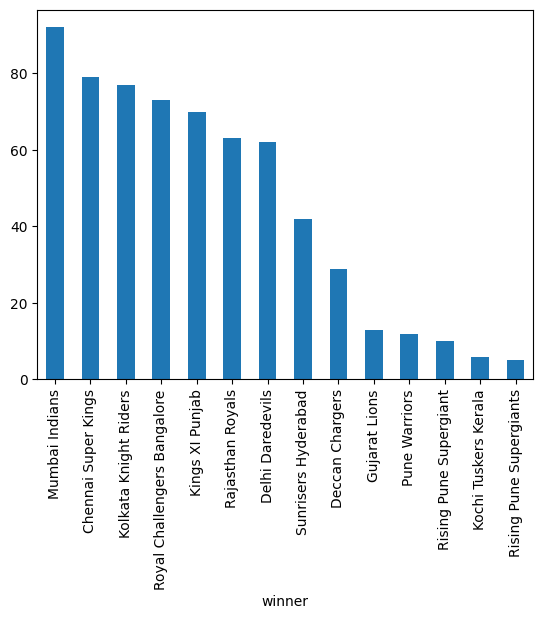

In [58]:
# barplot for no. of wins of each team
data['winner'].value_counts().plot(kind='bar')

<Axes: ylabel='winner'>

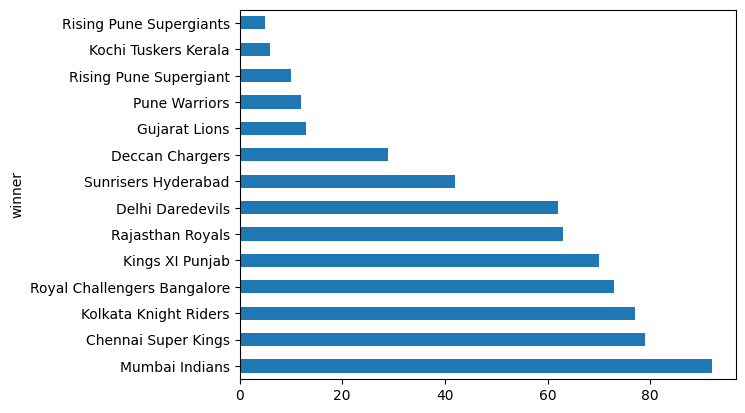

In [59]:
# horizontal barplot for no. of wins of each team
data['winner'].value_counts().plot(kind='barh')

<Axes: ylabel='count'>

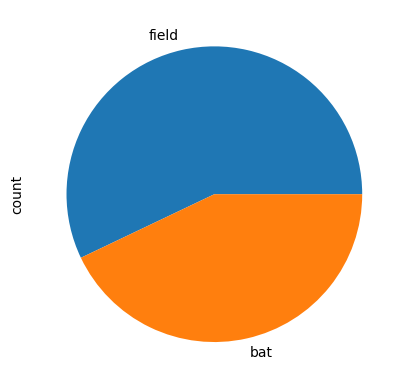

In [60]:
# pieplot for the decisions taken after toss wins
data['toss_decision'].value_counts().plot(kind='pie')

<Axes: ylabel='Frequency'>

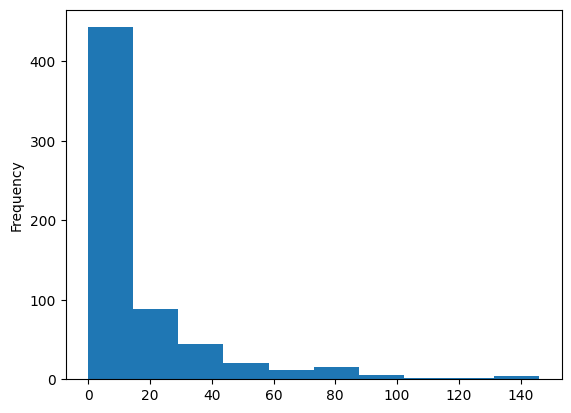

In [61]:
# histogram for win by runs
data['win_by_runs'].plot(kind='hist')

In [62]:
a=data['winner'].value_counts()
a.index
#index values are unique

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Gujarat Lions', 'Pune Warriors', 'Rising Pune Supergiant',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype='object', name='winner')

In [63]:
a.values
#values can repetitive

array([92, 79, 77, 73, 70, 63, 62, 42, 29, 13, 12, 10,  6,  5])

In [64]:
a['Royal Challengers Bangalore']
#provides the value corresponding to RCB

73

In [65]:
a.head()

winner
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Name: count, dtype: int64

In [66]:
a.tail()

winner
Gujarat Lions              13
Pune Warriors              12
Rising Pune Supergiant     10
Kochi Tuskers Kerala        6
Rising Pune Supergiants     5
Name: count, dtype: int64

In [67]:
(data['team1'].value_counts() + data['team2'].value_counts()).sort_values(ascending=False).head()

Mumbai Indians                 157
Royal Challengers Bangalore    152
Kings XI Punjab                148
Kolkata Knight Riders          148
Delhi Daredevils               147
Name: count, dtype: int64

In [54]:
#data['team1'].value_counts() * data['team2'].value_counts()

In [70]:
# sorting cities alphabetically in ascending order
data.sort_values('city')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
460,461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN
471,472,2014,Abu Dhabi,2014-04-26,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,23,0,Sandeep Sharma,Sheikh Zayed Stadium,HDPK Dharmasena,RK Illingworth,NaN
470,471,2014,Abu Dhabi,2014-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,PV Tambe,Sheikh Zayed Stadium,HDPK Dharmasena,C Shamshuddin,NaN
464,465,2014,Abu Dhabi,2014-04-21,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN
459,460,2014,Abu Dhabi,2014-04-18,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN


In [71]:
# sorting cities alphabetically in descending order
data.sort_values('city',ascending=False).head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
312,313,2012,Visakhapatnam,2012-04-07,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,normal,0,Chennai Super Kings,74,0,RA Jadeja,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,JD Cloete,HDPK Dharmasena,NaN
622,623,2016,Visakhapatnam,2016-05-15,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,80,0,KH Pandya,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,CK Nandan,NaN
615,616,2016,Visakhapatnam,2016-05-10,Sunrisers Hyderabad,Rising Pune Supergiants,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,A Zampa,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,CB Gaffaney,VK Sharma,NaN
612,613,2016,Visakhapatnam,2016-05-08,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,85,0,A Nehra,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,S Ravi,C Shamshuddin,NaN
624,625,2016,Visakhapatnam,2016-05-17,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,1,Rising Pune Supergiants,19,0,AB Dinda,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,C Shamshuddin,NaN


In [72]:
data.sort_values(['city','date'])
#ascending order of city and date

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
457,458,2014,Abu Dhabi,2014-04-16,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,41,0,JH Kallis,Sheikh Zayed Stadium,M Erasmus,RK Illingworth,NaN
459,460,2014,Abu Dhabi,2014-04-18,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN
460,461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN
464,465,2014,Abu Dhabi,2014-04-21,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN
470,471,2014,Abu Dhabi,2014-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,PV Tambe,Sheikh Zayed Stadium,HDPK Dharmasena,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN


In [73]:
data.sort_values(['city','date'],ascending=[False,True])
#descending order of city and ascending of date

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
312,313,2012,Visakhapatnam,2012-04-07,Chennai Super Kings,Deccan Chargers,Deccan Chargers,field,normal,0,Chennai Super Kings,74,0,RA Jadeja,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,JD Cloete,HDPK Dharmasena,NaN
315,316,2012,Visakhapatnam,2012-04-09,Deccan Chargers,Mumbai Indians,Deccan Chargers,bat,normal,0,Mumbai Indians,0,5,RG Sharma,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,AK Chaudhary,JD Cloete,NaN
528,529,2015,Visakhapatnam,2015-04-16,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,AM Rahane,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,PG Pathak,S Ravi,NaN
530,531,2015,Visakhapatnam,2015-04-18,Delhi Daredevils,Sunrisers Hyderabad,Delhi Daredevils,bat,normal,0,Delhi Daredevils,4,0,JP Duminy,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,PG Pathak,S Ravi,NaN
536,537,2015,Visakhapatnam,2015-04-22,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Sunrisers Hyderabad,16,0,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,RK Illingworth,VA Kulkarni,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN


In [74]:
data.sort_values(['city','date'],ascending=[False,False])
#descending order of city and date

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
628,629,2016,Visakhapatnam,2016-05-21,Kings XI Punjab,Rising Pune Supergiants,Kings XI Punjab,bat,normal,0,Rising Pune Supergiants,0,4,MS Dhoni,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,Nitin Menon,NaN
624,625,2016,Visakhapatnam,2016-05-17,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,1,Rising Pune Supergiants,19,0,AB Dinda,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,C Shamshuddin,NaN
622,623,2016,Visakhapatnam,2016-05-15,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,80,0,KH Pandya,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,CK Nandan,NaN
618,619,2016,Visakhapatnam,2016-05-13,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,7,MP Stoinis,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,CK Nandan,NaN
615,616,2016,Visakhapatnam,2016-05-10,Sunrisers Hyderabad,Rising Pune Supergiants,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,A Zampa,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,CB Gaffaney,VK Sharma,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN


In [77]:
data.drop_duplicates('city')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
31,32,2017,Chandigarh,2017-04-28,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,26,0,Rashid Khan,"Punjab Cricket Association IS Bindra Stadium, ...",Nitin Menon,CK Nandan,NaN
48,49,2017,Kanpur,2017-05-10,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,2,SS Iyer,Green Park,YC Barde,AK Chaudhary,NaN


In [80]:
data.drop_duplicates(['city','season']).shape

(107, 18)

In [86]:
#finding the winner of each season
data.drop_duplicates('season',keep='last')[['season','winner']].sort_values('season')

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians
